# 广义线性模型--“耿直”的算法模型

## 线性模型的基本概念

### 线性模型的一般公式

y = wx + b

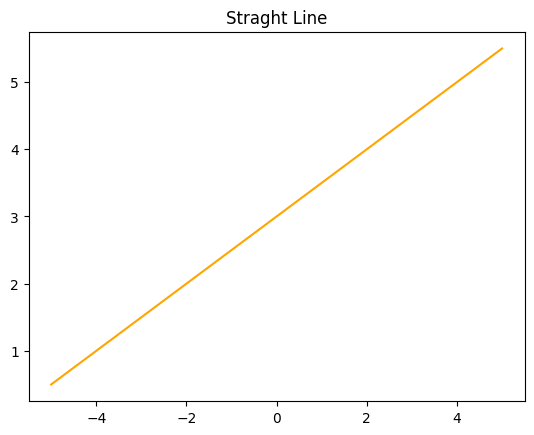

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 令 x 为 -5 到 5 之间，元素数为 100 的等差数列
x = np.linspace(-5, 5, 100)
# 输入直线方程
y = 0.5*x + 3

plt.plot(x,y,c='orange')
plt.title('Straght Line')

plt.show()

### 线性模型的图形表示

我们在初中数学（也可能是小学数学）中学过，两个点可以确定一条直线。

假设两个点，它们的坐标是 （1.3）和（4，5），

那么我们可以画一条直线来穿过这两个点，并且计算出这条直线的方程。

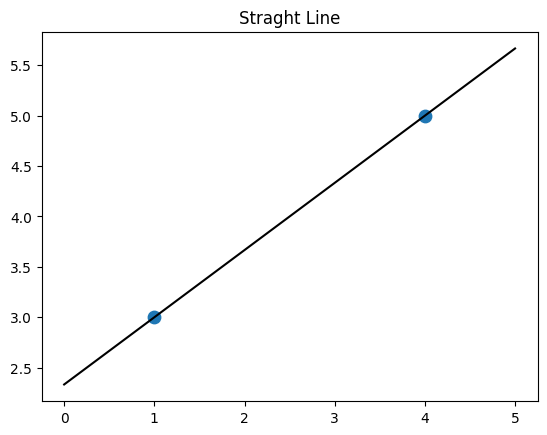

In [29]:
from sklearn.linear_model import LinearRegression

X = [[1],[4]]

y = [3,5]

lr = LinearRegression().fit(X, y)

z = np.linspace(0, 5, 20)

plt.scatter(X, y, s=80)
plt.plot(z, lr.predict(z.reshape(-1, 1)), c='k')
plt.title('Straght Line')

plt.show()

【结果分析】图中表示的就是穿过上述数据点的直线，现在我们可以确定这条直线的方程

In [30]:
print('y = {:.3f}'.format(lr.coef_[0]), 'x', '+ {:.3f}'.format(lr.intercept_))

y = 0.667 x + 2.333


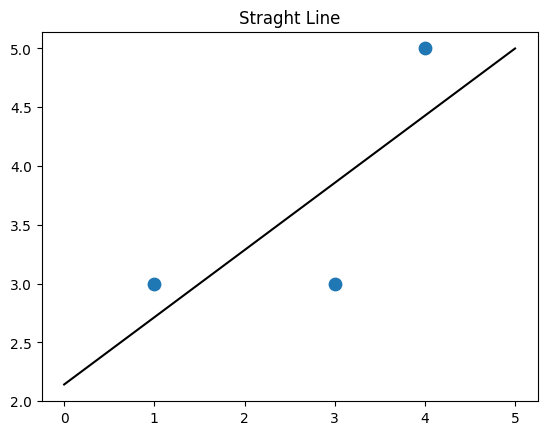

In [31]:
X = [[1], [4], [3]]
y = [3,5,3]

lr = LinearRegression().fit(X, y)

z = np.linspace(0, 5, 20)

plt.scatter(X, y, s=80)
plt.plot(z, lr.predict(z.reshape(-1,1)), c='k')
plt.title('Straght Line')

plt.show()

【结果分析】 这次没有穿过一个点，而是位于一个和3个点的距离相加最小的位置。

下面我们可以计算这条直线的方程

In [32]:
print('y = {:.3f}'.format(lr.coef_[0]), 'x', '+ {:3f}'.format(lr.intercept_))

y = 0.571 x + 2.142857


现在我们以 scikit-learn 生成的 make_regression 数据集为例，

用 Python 语句绘制一条线性模型的预测线，更清晰地反映出线性模型的原理。

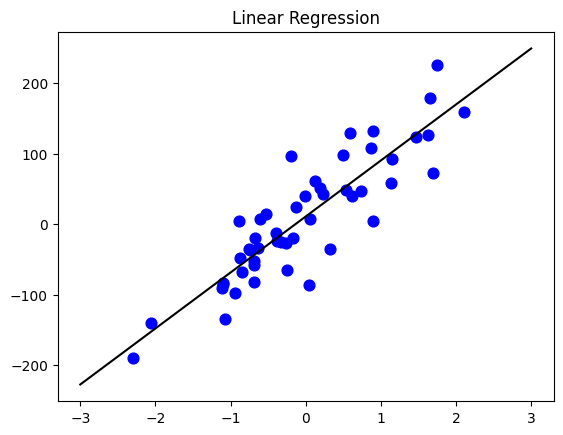

In [33]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)

reg = LinearRegression()
reg.fit(X,y)

z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,y,c='b', s=60)
plt.plot(z, reg.predict(z), c='k')
plt.title("Linear Regression")

plt.show()

【结果分析】从图中可以看出，黑色直线是线性回归模型在 make_regression 

数据集中生成的预测线。接下来我们来看一下这条直线所对应的斜率和截距。

In [34]:
print('直线的系数是：{:.2f}'.format(reg.coef_[0]))
print('直线的截距是：{:.2f}'.format(reg.intercept_))

直线的系数是：79.52
直线的截距是：10.92


【结果分析】从图 4-7 中我们可以看到，在我们手工生成的数据中，线性模型的方程为

y = 79.52 x + 10.92

而这条直线距离 50 个数据点的距离之和，是最小的。这便是一般线性模型的原理。

### 线性模型的特点

在上面的内容中，我们使用的都是特征数只有 1 个点数据集。

用于回归分析点线性模型在特征数为 1 的数据集中，

是使用一条直线来进行预测分析，

而当数据的特征数量达到2个则是一个平面，而对于更多特征数量的数据集来说，

则是一个高维度的超平面。

## 最基本的线性模型--线性回归

### 线性回归的基本原理

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

lr = LinearRegression().fit(X_train, y_train)

方程的斜率为 w, 也被称为权重或者系数，被存储在 coef_ 属性中，而截距 b 被存储在 intercept_ 属性中

In [36]:
print("lr.coef_: {}".format(lr.coef_[:]))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [70.38592453  7.43213621]
lr.intercept_: -1.4210854715202004e-14


【结果分析】intercept_ 属性一直是一个浮点数， 而 coef_ 属性则是一个 Numpy 数组，

其中每个特征对应数据中的一个数值，由于我们每次使用 make_regression 生成的数据集中数据点有 2 个特征，

所以 lr.coef_ 是一个二维数组。

也就是说本例中线性回归模型的方程可以表示为

y = 70.3859 x X1 + 7.4321 x X2 - 142 e**-14

### 线性回归的性能表现

In [37]:
print("训练数据集得分： {:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分： {:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分： 1.00
测试数据集得分： 1.00


【结果分析】这是一个令人振奋的分数，

模型在训练集和测试集中分别取得了满分，也就是 1.00 分的好成绩！

不过不要高兴太早，这是因为我们这次没有向数据集添加 noise，

所以分数自然会打到满分了。不过真实世界的数据集可就没有那么简单了。

In [38]:
from sklearn.datasets import load_diabetes

# 载入糖尿病情数据集
X, y = load_diabetes().data, load_diabetes().target

# 将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

# 使用线性回归模型进行拟合
lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分：0.53
测试数据集得分：0.46


【结果分析】对比这个分数，会发现这次模型的分数降低了很多，

模型在训练数据集中分数只有 0.53，

而测试数据集的得分就只有 0.46 了，

由于真实世界的数据复杂程度要比我们手工合成的数据高得多，

使得线性回归的表现大幅下降，

此外，由于线性回归自身的特点，非常容易出现过拟合的现象。

在训练集的得分和测试集的得分之间存在的巨大的差异是出现过拟合问题的明确信号，

因此，我们应该找到一个模型，使我们能够控制模型的复杂度。

标准线性回归最常用的替代模型之一是岭回归。

## 使用 L2 正则化的线性模型--岭回归

### 岭回归的原理

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("岭回归的训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("岭回归的测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))

岭回归的训练数据集得分：0.43
岭回归的测试数据集得分：0.43


【结果分析】现在我们看到，使用岭回归后， 训练数据集的得分比线性回归要稍微低一些，

而测试数据集的得分却出人意料的和训练集的得分一致，这和我们的预期基本是一致的。

### 岭回归的参数调节

岭回归是在模型的简单性（使系数趋近于零）和它在训练集上的性能之间取得平衡的一种模型。

用户可以使用 alpha 参数控制模型更加简单性还是在训练集上的性能更高。

在上一个示例中，我们使用默认参数 alpha=1。

In [41]:
# 修改 alpha 参数为 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))

训练数据集得分：0.43
测试数据集得分：0.43


【结果分析】提高了 alpha 值之后，我们看到模型的得分大幅降低了，

有意思的是， 模型在测试集的得分超过了在训练集的得分。

这说明，如果我们的模型出现了过拟合的现象，

那么我们可以提高 alpha 值来降低过拟合的程度

同时，降低 alpha 值会让系数的限制变得不那么严格，

如果我们用一个非常小的 alpha 值， 那么系统的限制几乎可以忽略不计，得到的结果也会非常接近线性回归。

In [42]:
# 修改 alpha 参数为 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))

训练数据集得分：0.43
测试数据集得分：0.43


【结果分析】仙子啊我们看到，把参数 alpha 设置为 0.1 似乎让模型的在训练集的得分比线性回归模型略低，

但在测试集的得分，却有轻微的提升。

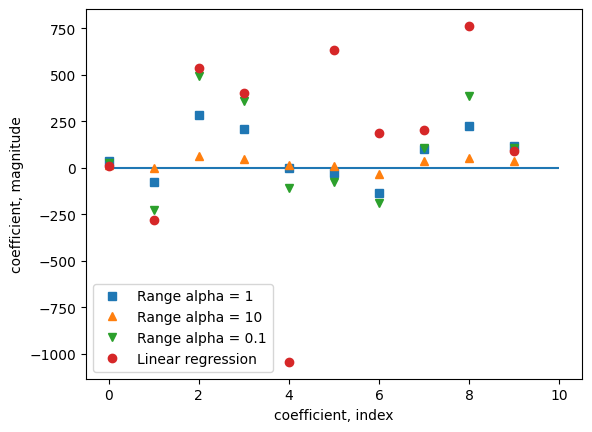

In [43]:
# 绘制 alpha = 1 时的模型系数
plt.plot(ridge.coef_, 's', label = 'Range alpha = 1')

# 绘制 alpha = 10 时的模型系数
plt.plot(ridge10.coef_, '^', label = 'Range alpha = 10')

# 绘制 alpha = 0.1 时的模型系数
plt.plot(ridge01.coef_, 'v', label = 'Range alpha = 0.1')

# 绘制线性回归的系数作为对比
plt.plot(lr.coef_, 'o', label = 'Linear regression')

plt.xlabel("coefficient, index")

plt.ylabel("coefficient, magnitude")

plt.hlines(0, 0, len(lr.coef_))

plt.legend()

plt.show()

【结果分析】在图中，横轴代表的是 coef_ 属性： 
x=0 显示第一个特征变量的系数，

x=1 显示第二个特征变量的系数，

以此类推，直到x=10.

纵轴显示特征变量的系数量级。

从图中我们不难看出， 当 alpha=10 时，特征变量系数大多在0附近；

而当 alpha=1 时，特征变量系数大多在 0 附近；

而当 alpha=10 时， 特征变量的系数就更大了，

甚至大部分与线性回归的点重合了，

而线性回归模型由于没有经历任何正则化处理，

其所对应的特征变量系数值就会非常大，其中有一些都快跑到图标之外了。

还有一个能够帮助我们更好理解正则化对模型影响的方法，

那就是取一个固定的 alpha 值，然后改变训练数据集中的数据量，

然后改变训练数据集中的采样，然后用这些采样的子集对线性回归模型和 alpha 值等于 1 的岭回归模型进行评估，

并用 jupyter notebook 进行绘图得到一个随数据集大小而不断改变的模型评分折线图，

其中的折现我们也称之为学习曲线（leaning curves）。

下面我们来初步画一下两个模型在糖尿病数据集中的学习曲线。

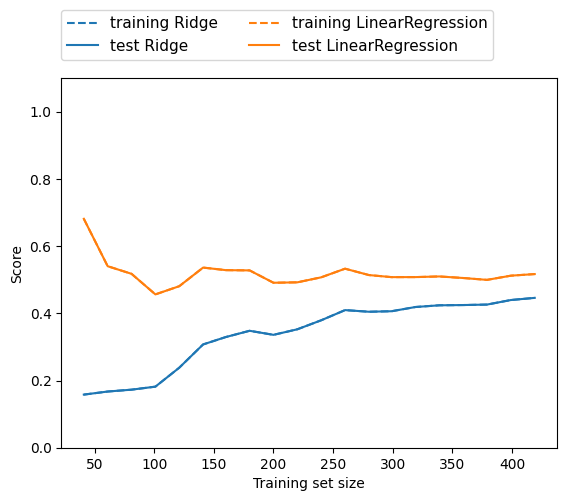

In [44]:
from sklearn.model_selection import learning_curve, KFold

# 定义一个绘制学习曲线的函数

def plot_learning_curve(est, X, y):
    training_set_size, training_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1)
    )

    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, training_scores.mean(axis=1), '--', label="training " + estimator_name)
    plt.plot(training_set_size, training_scores.mean(axis=1), '-', label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)

plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

plt.show()

【结果分析】毫无疑问，不论在岭回归中还是线性回归中，

训练数据集中的得分都比测试数据集的得分要高。

而由于岭回归是经过正则化的模型，

因此它在整个图像中训练数据集的得分要比线性回归的得分低。

然而，岭回归在测试数据集的得分与训练数据集的得分差异就要小一些，

尤其是在数据子集比较小的情况下。

在数据量小于 50 条的情况下，线性回归几乎不能让机器学习学到任何东西。

随着数据集的规模越来越大，两个模型的表现也越来越好， 

最后线性回归的得分赶上了岭回归。

不难看出，如果有足够多的数据， 那么正则化就显得不是那么重要了，

岭回归和线性回归的表现也相差无几。

## 使用 L1 正则化的线性模型--套索回归

### 套索回归的原理

和岭回归一样，套索回归也会将系统限制在非常接近0点范围内，但是进行限制的方式稍微有一点不同，

我们称之为 L1 正则化。

与 L2 正则化不同的是， L1 正则化会导致在使用套索回归的时候，

有一部分特征的系数会正好等于0.

也就是说，有一些特征的系数会正好等于 0。

也就是说，有一些特征会彻底被模型忽略掉，这也可以看成是模型对于特征进行自动选择的一种方式。

把一部分系数变成0有助于让模型更容易理解，而且突出体现模型中最重要的那些特征。

让我们再用糖尿并数据来验证一下套索回归。

In [45]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("套索回归训练数据集得分：{:.2f}".format(lasso.score(X_train, y_train)))
print("套索回归测试数据集得分：{:.2f}".format(lasso.score(X_test, y_test)))
print("套索回归使用的特征数：{}".format(np.sum(lasso.coef_ != 0)))

套索回归训练数据集得分：0.36
套索回归测试数据集得分：0.37
套索回归使用的特征数：3


【结果分析】这里我们看到，套索回归在训练数据集和测试数据集的得分都相当糟糕。

这意味着我们的模型发生了欠拟合的问题，而且你会发现，

在10个特征里面，套索回归只用了 3 个。

与岭回归类似，套索回归也有一个正则化参数 alpha，

用来控制特征变量系数被约束为 0 的强度。

### 套索回归的参数调节


In [46]:
# 增加最大迭代次数的默认设置
# 否则模型会提示我们增加最大迭代次数
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)

print("alpha=0.1 套索回归训练数据集得分：{:.2f}".format(lasso01.score(X_train, y_train)))
print("alpha=0.1 套索回归测试数据集得分：{:.2f}".format(lasso01.score(X_test, y_test)))
print("alpha=0.1 套索回归使用的特征数：{}".format(np.sum(lasso01.coef_ != 0)))

alpha=0.1 套索回归训练数据集得分：0.52
alpha=0.1 套索回归测试数据集得分：0.48
alpha=0.1 套索回归使用的特征数：7


【结果分析】从结果来看，降低 alpha 值可以拟合出更复杂的模型，

从而在训练数据集和测试数据集都能获得良好的表现。

相对岭回归，套索回归的表现还要稍微好一点，而且它之用了 10 个特征中的 7 个，

这一点也会使模型更容易被人理解。

但是如果我们把 alpha 值设置得太低， 就等于把正则化的效果去除了，

那么模型就可能会像线性回归一样，出现过拟合的问题。

比如我们把 alpha 值设为 0.0001。

In [48]:
# 修改 alpha 值为 0.0001
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("alpha=0.0001 套索回归训练数据集得分：{:.2f}".format(lasso0001.score(X_train, y_train)))
print("alpha=0.0001 套索回归测试数据集得分：{:.2f}".format(lasso0001.score(X_test, y_test)))
print("alpha=0.0001 套索回归使用的特征数：{}".format(np.sum(lasso0001.coef_ != 0)))

alpha=0.0001 套索回归训练数据集得分：0.53
alpha=0.0001 套索回归测试数据集得分：0.46
alpha=0.0001 套索回归使用的特征数：10


【结果分析】从结果中我们看到，套索回归使用了全部的特征，

而且在测试数据集中的得分稍微低于在 alpha 等于 0.1 时的得分，

这说明降低 alpha 的数值会让模型倾向于出现过拟合的现象。

### 套索回归与岭回归的对比

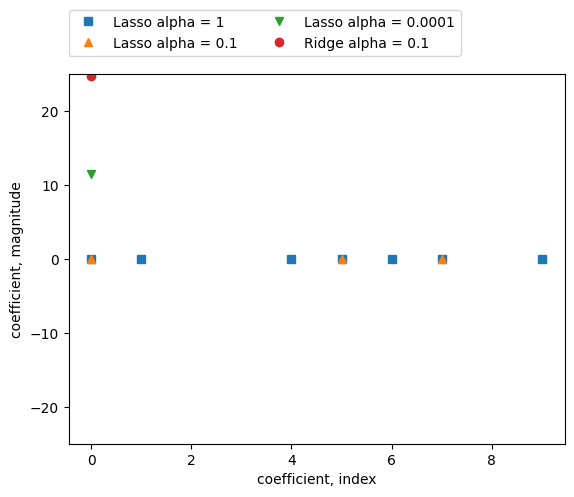

In [49]:
# 绘制 alpha = 1 时的模型系数
plt.plot(lasso.coef_, 's', label = 'Lasso alpha = 1')

# 绘制 alpha = 10 时的模型系数
plt.plot(lasso01.coef_, '^', label = 'Lasso alpha = 0.1')

# 绘制 alpha = 0.1 时的模型系数
plt.plot(lasso0001.coef_, 'v', label = 'Lasso alpha = 0.0001')

# 绘制线性回归的系数作为对比
plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25, 25)
plt.xlabel("coefficient, index")

plt.ylabel("coefficient, magnitude")

plt.show()

【结果分析】从图中我们不难看出， 当 alpha 值等于 1 的时候，

不仅大部分系数为 0， 而且仅存的几个非零系数数值也非常小。

把alpha值降低到 0.01 时，如图中正三角形所示，大部分系数也是0，但是等于0的系数已经比alpha等于1的时候少了很多。

而当我们把 alpha 值降低到 0.0001的时候，整个模型变得几乎没有被正则化，大部分系数都是非零的，并且数值变得相当大。

作为对比，我们能看到圆点代表的是岭回归中的系数值。

alpha值等于0.1的岭回归模型在预测能力方面基本与 alpha 值等于 0.1 的套索回归模型一致，

但你会发现，使用岭回归模型的时候，几乎所有的系数都是不等于0的。

在实践当中，岭回归往往是这两个模型中的优选。

但是如果你的数据特征过多，而且其中只有一小部分是真正重要的，

那么套索回归就是更好的选择。

同样如果你需要对模型进行解释的话，那么套索回归会让你的模型更容易被人理解，因为它只是使用了输入的特征值中的一部分。

## 小结

在本章中，我们介绍了几种常用的线性模型，包括线性回归、岭回归和套索回归。

实际上，线性模型并不止这三种，还有比较知名的逻辑斯谛回归(Logistic Regression)、线性支持向量机(Linear SVM)等，

它们不仅仅可以用来进行回归分析，在分类任务中也相当常见。

对于线性模型来说，最主要的参数就是正则化参数(Regularization Parameter)。

在线性回归、岭回归和套索回归中，是通过 alpha 参数来进行调节的，

而对于逻辑斯谛回归和线性支持向量机来说，则是通过调节参数 C 来实现的

当然在实际应用中，我们常常要先决定是使用 L1 正则化的模型还是 L2 正则化的模型。

大体的原则是这样，如果你的数据集有很多特征，

而这些特特征中并不是每一个都对结果有重要的影响，那么就应该使用L1正则化的模型，如套索回归；

但如果数据集中的特征本来就不多，而且每一个都有重要作用的话，那么就应该使用L2正则化的模型，如岭回归。

虽然线性模型是一个存在历史相当悠久的算法模型，但目前它们的应用依然非常普遍，

这主要是因为线性模型的训练速度非常快，尤其是对于那些超大型数据集来讲。

而且其过程非常容易被人理解——基本上学过初中数学的人都能明白线性模型的原理。

但是它也有一定的局限性，当数据集的特征比较少的时候，线性模型的表现就会相对偏弱一些。

在第5章当中，我们将带大家一起学习另外一种非常流行的算法——朴素贝叶斯算法。

这是一种基于概率理论的算法，它的效率比线性模型还要更高一些。

请大家做好准备，和我们一起向下一站出发。